<a href="https://colab.research.google.com/github/RhythmSanghi23/Living-Next-Door/blob/main/Team_65_Module1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np 
import random
from tqdm import tqdm_notebook
import folium 
from geopy.geocoders import Nominatim
import urllib.request
from bs4 import BeautifulSoup
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangalore'
page_unparsed = urllib.request.urlopen(url)
soup = BeautifulSoup(page_unparsed, 'html.parser')

wiki_table = soup.find_all("table", {"class": "wikitable"})
wiki_table

[<table class="wikitable sortable">
 <tbody><tr>
 <th style="background:light gray; color:black">Name
 </th>
 <th class="unsortable" style="background:light gray; color:black">Image
 </th>
 <th class="unsortable" style="background:light gray; color:black">Summary
 </th></tr>
 <tr>
 <td><a href="/wiki/Bangalore_Cantonment" title="Bangalore Cantonment">Cantonment</a> area
 </td>
 <td>
 </td>
 <td>The Cantonment area in Bangalore was used as a military cantonment during the <a href="/wiki/British_Raj" title="British Raj">British Raj</a> in the 19th century. After the Indian independence, the area merged with rest of the city but still retains names for localities and streets used by the British as well as the colonial architecture in many buildings. Some localities which come under this area are <a href="/wiki/Richmond_Town" title="Richmond Town">Richmond Town</a>, <a href="/wiki/Austin_Town" title="Austin Town">Austin Town</a>, <a href="/wiki/Murphy_Town,_Bangalore" title="Murphy Town, B

In [ ]:
df=pd.read_html(str(wiki_table))
# convert list to dataframe
df1=pd.DataFrame(df[0])
df2=pd.DataFrame(df[1])
df3=pd.DataFrame(df[2])
df4=pd.DataFrame(df[3])
df5=pd.DataFrame(df[4])
df6=pd.DataFrame(df[5])
df7=pd.DataFrame(df[6])

print(df4.head())

          Name  Image  Summary
0       Hebbal    NaN      NaN
1    Jalahalli    NaN      NaN
2    Mathikere    NaN      NaN
3       Peenya    NaN      NaN
4  R. T. Nagar    NaN      NaN


In [ ]:
whole=pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=0)
whole.head()

,Name,Image,Summary
0,Cantonment area,NaN,The Cantonment area in Bangalore was used as a...
1,Domlur,NaN,"Formerly part of the Cantonment area, Domlur h..."
2,Indiranagar,NaN,Indiranagar is a sought-after residential and ...
3,Rajajinagar,NaN,Established in 1949 on the birthday of C. Raja...
4,Malleswaram,NaN,NaN


In [ ]:
whole1=whole.drop(['Image'], axis = 1)
whole1.drop(['Summary'], axis = 1)

,Name
0,Cantonment area
1,Domlur
2,Indiranagar
3,Rajajinagar
4,Malleswaram
5,Pete area
6,Sadashivanagar
7,Seshadripuram
8,Shivajinagar
9,Ulsoor


In [ ]:
import os 
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
neighborhoods = pd.read_csv('/content/drive/My Drive/csv/blr_neighborhoods.csv')
neighborhoods=neighborhoods.drop(neighborhoods.columns[0], axis = 1)
neighborhoods

,Neighborhood,Latitude,Longitude
0,Agram,45.813177,15.977048
1,Amruthahalli,13.066513,77.596624
2,Attur,11.663711,78.533551
3,Banaswadi,13.014162,77.651854
4,Bellandur,58.235358,26.683116
...,...,...,...
347,Virupakshipura,13.024075,76.469658
348,Vishwanathapura,13.273529,77.649099
349,Yadamaranahalli,12.427249,77.379083
350,Yadavanahalli,12.789855,77.751454


In [ ]:
CLIENT_ID = 'SP3AT23DDLXX2HYGQ3ZXMRY0MGAHAAFOCOZMSYIUZSSFMVPG' # your Foursquare ID
CLIENT_SECRET = 'CXR0GVU1PIZHCFA10IMC5YBYUXGTCXDHLVLNHWJIM044RAM3' # your Foursquare Secret
VERSION = '20190130'

In [ ]:
#neighborhood_name = neighborhoods.loc[0, 'Neighborhood']
neighborhood_latitude = neighborhoods[neighborhoods['Neighborhood'] == 'Banaswadi']['Latitude']
neighborhood_longitude = neighborhoods[neighborhoods['Neighborhood'] == 'Banaswadi']['Longitude']

# limit of number of venues returned by Foursquare API
LIMIT = 100 
radius = 500


In [ ]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()

In [ ]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list = []
    for name, lat, lng in tqdm_notebook(zip(names, latitudes, longitudes), total = neighborhoods.shape[0], unit = 'neighborhoods'):
        # print(name)

        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID[::-1], 
            CLIENT_SECRET[::-1], 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['categories'][0]['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue ID',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
print(url)

https://api.foursquare.com/v2/venues/explore?&client_id=SP3AT23DDLXX2HYGQ3ZXMRY0MGAHAAFOCOZMSYIUZSSFMVPG&client_secret=CXR0GVU1PIZHCFA10IMC5YBYUXGTCXDHLVLNHWJIM044RAM3&v=20190130&ll=3    13.014162
Name: Latitude, dtype: float64,3    77.651854
Name: Longitude, dtype: float64&radius=500&limit=100


In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
address = 'Bangalore, Karnataka'

geolocator = Nominatim(user_agent="bangalore_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of bangalore are {}, {}.'.format(latitude, longitude))

The geographical coordinate of bangalore are 12.9767936, 77.590082.


In [ ]:
bangalore_venues = pd.read_csv('/content/drive/My Drive/csv/Bangalore_locations_with_neighbourhood.csv')
bangalore_venues.head()

,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Air Force Hospital,12.964027,77.627500,GOLDEN ACES,12.962327,77.630772,Casino
1,1,Air Force Hospital,12.964027,77.627500,inox,12.966699,77.624227,Multiplex
2,2,Amruthahalli,13.066513,77.596624,Reliance Fresh,13.066264,77.596961,Convenience Store
3,3,Amruthahalli,13.066513,77.596624,Bata,13.065699,77.599402,Shoe Store
4,4,Amruthahalli,13.066513,77.596624,Print Central,13.062902,77.596335,Print Shop


In [ ]:
bangalore_onehot = pd.get_dummies(bangalore_venues[['Venue Category']], prefix="", prefix_sep="")
bangalore_onehot['Neighborhood'] = bangalore_venues['Neighborhood'] 
fixed_columns = [bangalore_onehot.columns[-1]] + list(bangalore_onehot.columns[:-1])
bangalore_onehot = bangalore_onehot[fixed_columns]
bangalore_onehot.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Andhra Restaurant,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Badminton Court,Bakery,Bar,Basketball Court,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Candy Store,Capitol Building,Casino,Chaat Place,Chettinad Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,...,Rajasthani Restaurant,Resort,Restaurant,Road,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Toll Plaza,Toy / Game Store,Trail,Train Station,Travel & Transport,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Vineyard,Wine Shop,Women's Store,Yoga Studio
0,Air Force Hospital,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Air Force Hospital,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Amruthahalli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Amruthahalli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Amruthahalli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
bangalore_grouped = bangalore_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_grouped


,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Andhra Restaurant,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Badminton Court,Bakery,Bar,Basketball Court,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Candy Store,Capitol Building,Casino,Chaat Place,Chettinad Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,...,Rajasthani Restaurant,Resort,Restaurant,Road,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Toll Plaza,Toy / Game Store,Trail,Train Station,Travel & Transport,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Vineyard,Wine Shop,Women's Store,Yoga Studio
0,Adugodi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Air Force Hospital,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Amruthahalli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Anandnagar Bangalore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Anekal,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Whitefield,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,Wilson Garden,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.00,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,Yelachenahalli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_grouped['Neighborhood']

for ind in np.arange(bangalore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adugodi,Athletics & Sports,Gym,Bus Station,Café,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant
1,Air Force Hospital,Multiplex,Casino,Yoga Studio,Electronics Store,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant
2,Amruthahalli,Indian Restaurant,Shoe Store,Print Shop,Convenience Store,Airport,Electronics Store,Food Truck,Food & Drink Shop,Food,Flower Shop
3,Anandnagar Bangalore,Indian Restaurant,Motorcycle Shop,Hotel,Pharmacy,Garden Center,Electronics Store,Food,Flower Shop,Flea Market,Fish & Chips Shop
4,Anekal,ATM,Camera Store,Cupcake Shop,Food Truck,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant


In [ ]:
# set number of clusters
kclusters = 4

bangalore_grouped_clustering = bangalore_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bangalore_grouped_clustering)

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
bangalore_merged = neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bangalore_merged = bangalore_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bangalore_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agram,45.813177,15.977048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Amruthahalli,13.066513,77.596624,3.0,Indian Restaurant,Shoe Store,Print Shop,Convenience Store,Airport,Electronics Store,Food Truck,Food & Drink Shop,Food,Flower Shop
2,Attur,11.663711,78.533551,0.0,Juice Bar,Yoga Studio,Eastern European Restaurant,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
3,Banaswadi,13.014162,77.651854,3.0,Vegetarian / Vegan Restaurant,Indian Restaurant,BBQ Joint,Pharmacy,Kerala Restaurant,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop
4,Bellandur,58.235358,26.683116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bangalore_merged = bangalore_merged[bangalore_merged['Cluster Labels'].notnull()]

# create map
map_clusters = folium.Map(location=[12.9767936, 77.590082], zoom_start=11)

# set color scheme for the clusters
'''
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters+1)]
colors_array = cm.hsv(np.linspace(0, 1, len(ys)))
hsv = [colors.rgb2hex(i) for i in colors_array]
'''

colors = ["#ff0000", "#3d84ad", "#000000", "#ffff00"]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bangalore_merged['Latitude'], bangalore_merged['Longitude'], bangalore_merged['Neighborhood'], bangalore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[int(cluster)],
        fill=True,
        fill_color=colors[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
       

map_clusters

In [ ]:
bangalore_merged.loc[bangalore_merged['Cluster Labels'] == 0, bangalore_merged.columns[[0] + list(range(4, bangalore_merged.shape[1]))]]['1st Most Common Venue'].value_counts().head()


Indian Restaurant       8
Pizza Place             3
Fast Food Restaurant    3
Playground              2
Pool                    2
Name: 1st Most Common Venue, dtype: int64

In [ ]:
bangalore_merged.loc[bangalore_merged['Cluster Labels'] == 1, bangalore_merged.columns[[0] + list(range(4, bangalore_merged.shape[1]))]]['1st Most Common Venue'].value_counts().head()


Indian Restaurant    7
Name: 1st Most Common Venue, dtype: int64

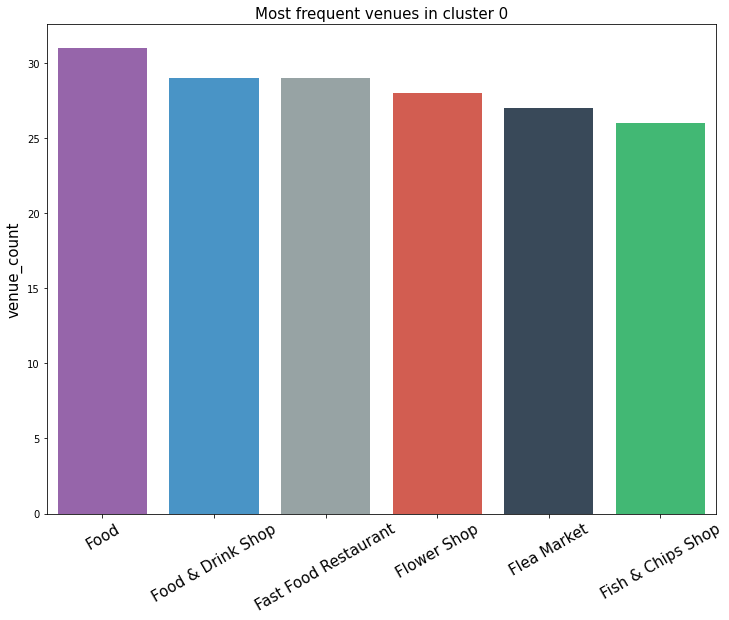

In [ ]:
clus1 = pd.DataFrame(pd.DataFrame(list(bangalore_merged[bangalore_merged['Cluster Labels'] == 0].iloc[:, 4:15].values.ravel()), columns = ['venue_count'])['venue_count'].value_counts()[:6])

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, ax = plt.subplots(figsize=(12, 9))
ax = sns.barplot(x = clus1.index, y = clus1['venue_count'], palette=(flatui))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30,  fontsize = 15)
ax.yaxis.label.set_size(15)
plt.title('Most frequent venues in cluster 0', fontsize = 15)
plt.show()

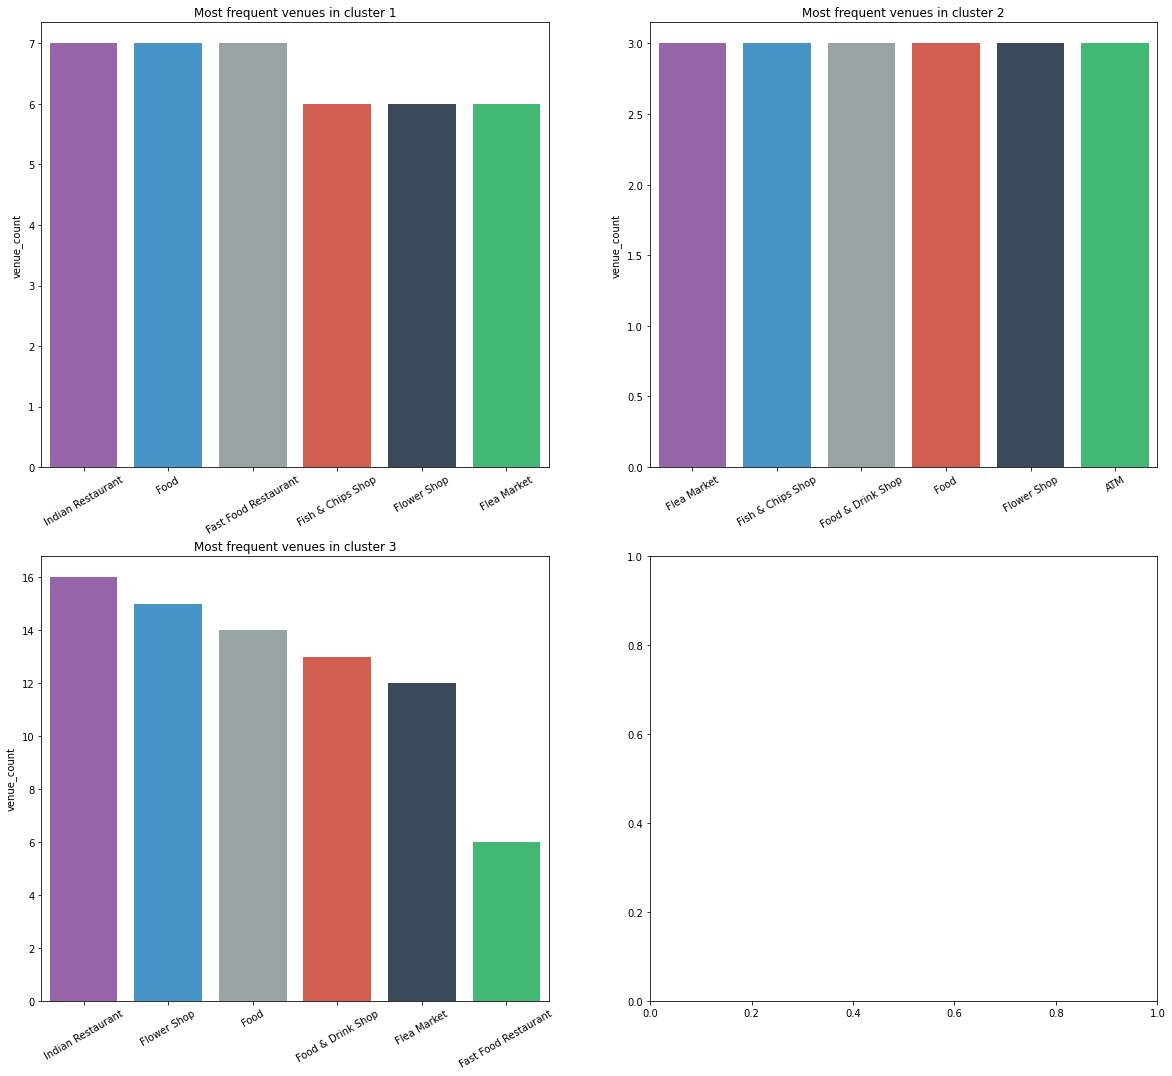

In [ ]:
clus1 = pd.DataFrame(pd.DataFrame(list(bangalore_merged[bangalore_merged['Cluster Labels'] == 1].iloc[:, 4:15].values.ravel()), columns = ['venue_count'])['venue_count'].value_counts()[:6])
clus2 = pd.DataFrame(pd.DataFrame(list(bangalore_merged[bangalore_merged['Cluster Labels'] == 2].iloc[:, 4:15].values.ravel()), columns = ['venue_count'])['venue_count'].value_counts()[:6])
clus3 = pd.DataFrame(pd.DataFrame(list(bangalore_merged[bangalore_merged['Cluster Labels'] == 3].iloc[:, 4:15].values.ravel()), columns = ['venue_count'])['venue_count'].value_counts()[:6])

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, ax = plt.subplots(2,2, figsize = (20, 18))


plt.subplot(2, 2, 1)
ax = sns.barplot(x = clus1.index, y = clus1['venue_count'], palette=(flatui))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.title('Most frequent venues in cluster 1')

plt.subplot(2, 2, 2)
ax = sns.barplot(x = clus2.index, y = clus2['venue_count'], palette=(flatui))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.title('Most frequent venues in cluster 2')

plt.subplot(2, 2, 3)
ax = sns.barplot(x = clus3.index, y = clus3['venue_count'], palette=(flatui))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.title('Most frequent venues in cluster 3', )


plt.show()